In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [52]:
df = pd.read_csv('concrete_data.csv')

In [53]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [54]:
df.shape

(1030, 9)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [56]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [57]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [58]:
X = df.iloc[:,1:8]

In [59]:
X

,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,142.5,0.0,228.0,0.0,932.0,594.0,270
3,142.5,0.0,228.0,0.0,932.0,594.0,365
4,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...
1025,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,186.7,0.0,175.6,11.3,989.6,788.9,28


In [60]:
Y = df.iloc[:,-1]

In [61]:
Y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Strength, Length: 1030, dtype: float64

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [63]:
X_train

,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
995,148.9,116.0,175.1,15.0,953.3,719.7,28
507,22.0,132.0,178.0,8.5,822.0,750.0,28
334,0.0,121.4,159.5,9.9,1053.6,777.5,3
848,97.0,76.0,194.0,8.0,835.0,821.0,28
294,42.2,124.3,158.3,10.8,1080.8,796.2,3
...,...,...,...,...,...,...,...
87,200.9,0.0,144.7,11.2,1004.6,803.7,3
330,0.0,125.1,143.3,12.0,1086.8,800.9,14
466,0.0,125.2,166.6,9.9,1079.0,798.9,100
121,118.8,0.0,181.1,8.9,852.1,781.5,28


In [64]:
#Applying Regression without any transformation

lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

In [65]:
y_pred

array([62.76909018, 48.12877765, 63.60106156, 47.68345904, 18.31008845,
       41.4677823 , 28.63815595, 44.51199734, 28.63006728, 40.46373095,
       34.55634115, 30.74261257, 68.46379461, 46.18783138, 27.8981601 ,
       38.33333118, 28.17281176, 28.43626829, 32.73193196, 29.52041333,
       34.81099785, 28.07967541, 34.03891014, 26.71946651, 38.15819235,
       33.04839349, 17.58905492, 45.50025125, 42.01285446, 26.33133558,
       36.9014164 , 33.56129257, 42.91051001, 47.50867812, 28.18984049,
       32.64072511, 27.85316144, 42.25927116, 22.90753136, 36.19044394,
       23.16859043, 18.95337184, 30.59234686, 42.83262704, 16.78072992,
       51.85984933, 52.22573424, 65.49822579, 21.69901249, 21.93284682,
       40.12331232, 38.58515873, 28.11939784, 30.73363552, 36.20574   ,
       45.95937781, 27.07145217, 20.77068796, 30.58461939, 22.65904842,
       42.05166616, 31.83332856, 27.57970609, 54.65453411, 25.77811217,
       30.13727207, 32.65225529, 24.25746957, 20.34818894, 22.40

In [66]:
r2_score(y_test,y_pred)

0.5582175790319941

In [67]:
# cross checking with cross val score

lr = LinearRegression()
np.mean(cross_val_score(lr,X,Y,scoring='r2'))



np.float64(0.3111361238369776)

C:\Users\Gayathri\AppData\Local\Temp\ipykernel_8288\1268627929.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


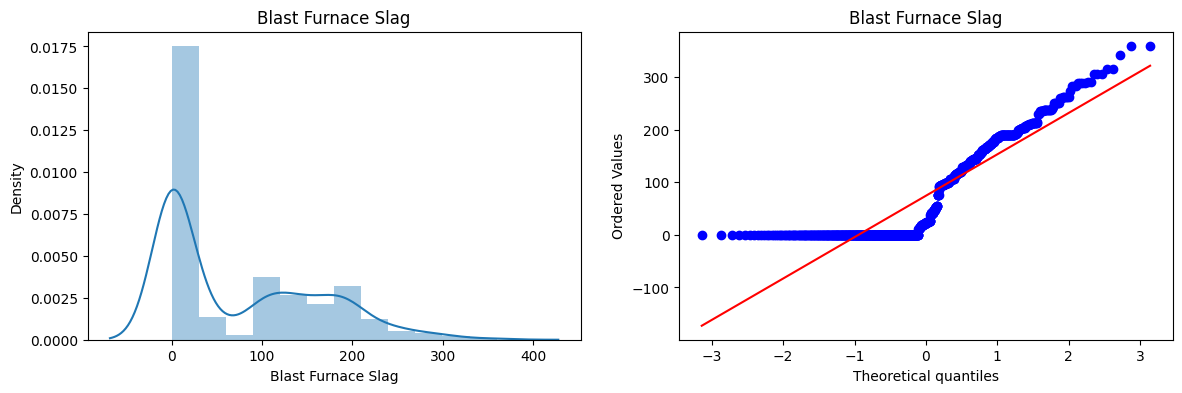

C:\Users\Gayathri\AppData\Local\Temp\ipykernel_8288\1268627929.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


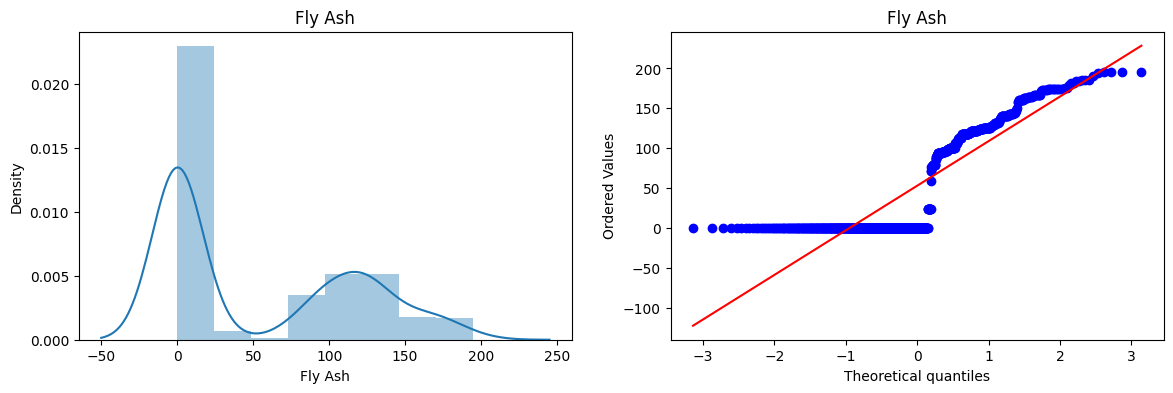

C:\Users\Gayathri\AppData\Local\Temp\ipykernel_8288\1268627929.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


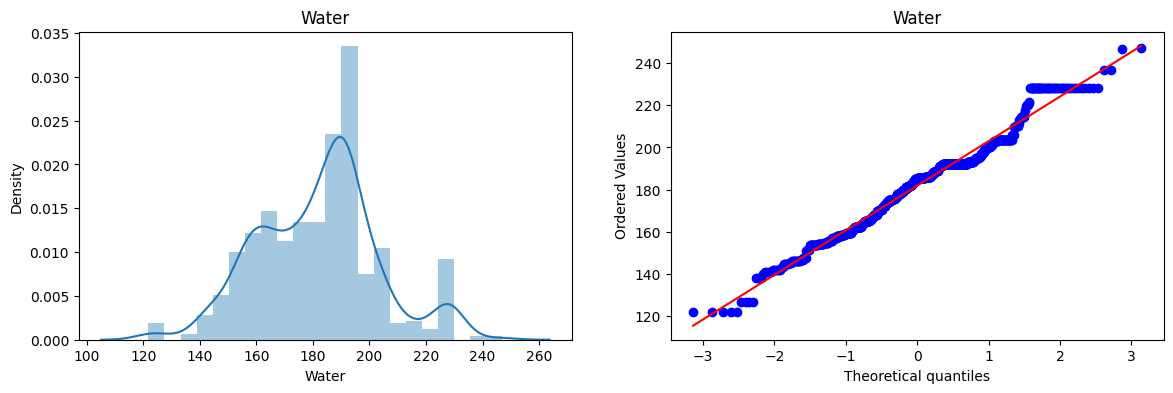

C:\Users\Gayathri\AppData\Local\Temp\ipykernel_8288\1268627929.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


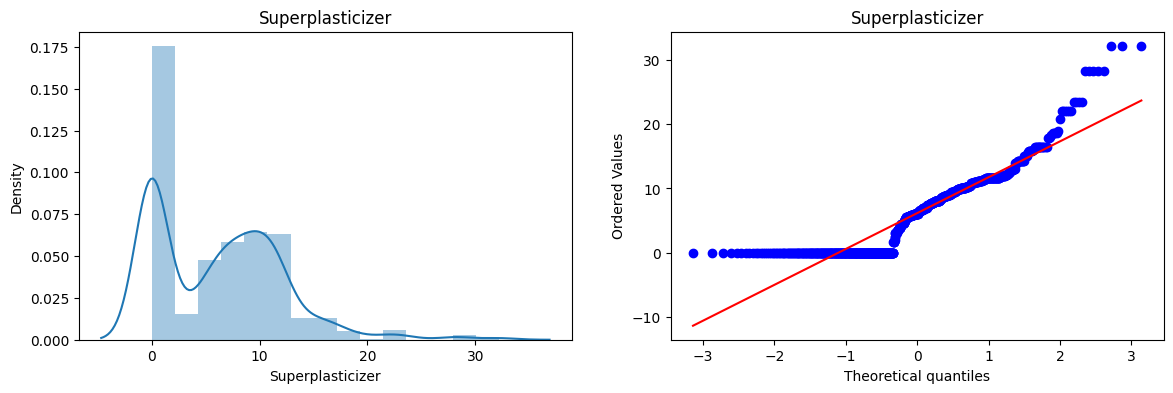

C:\Users\Gayathri\AppData\Local\Temp\ipykernel_8288\1268627929.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


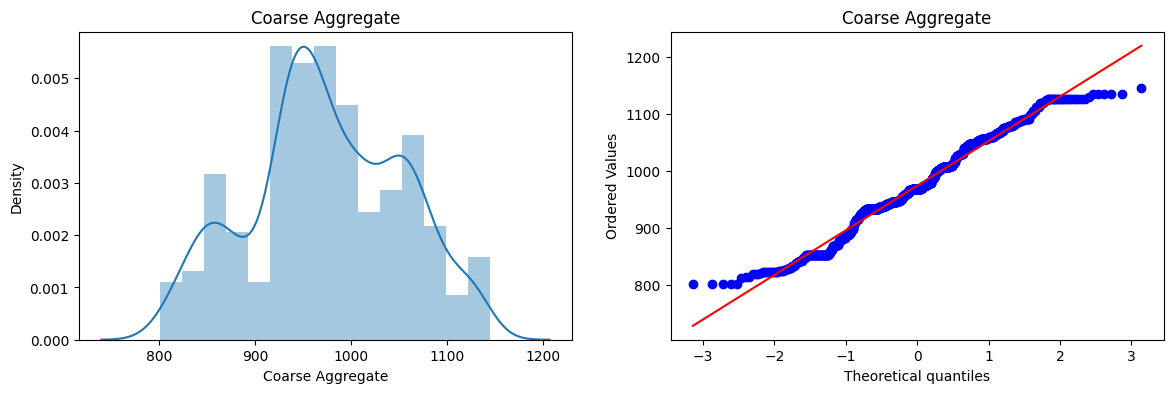

C:\Users\Gayathri\AppData\Local\Temp\ipykernel_8288\1268627929.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


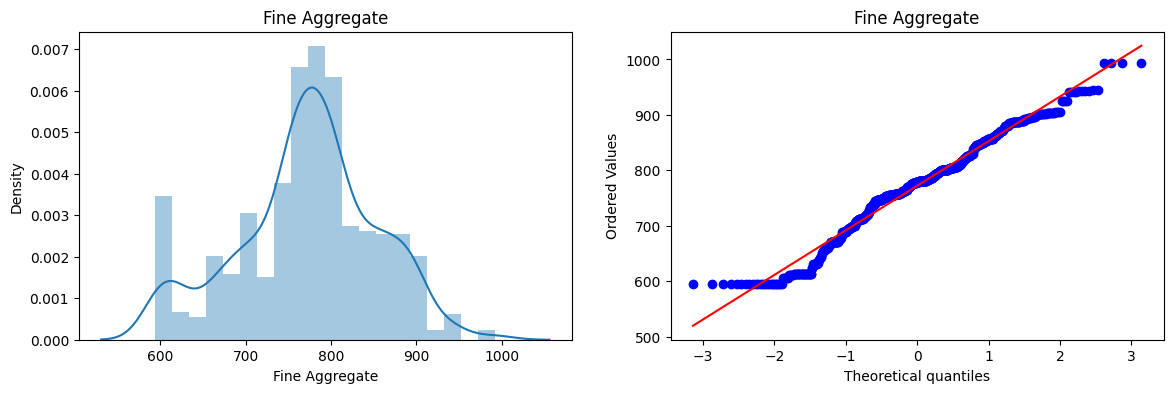

C:\Users\Gayathri\AppData\Local\Temp\ipykernel_8288\1268627929.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


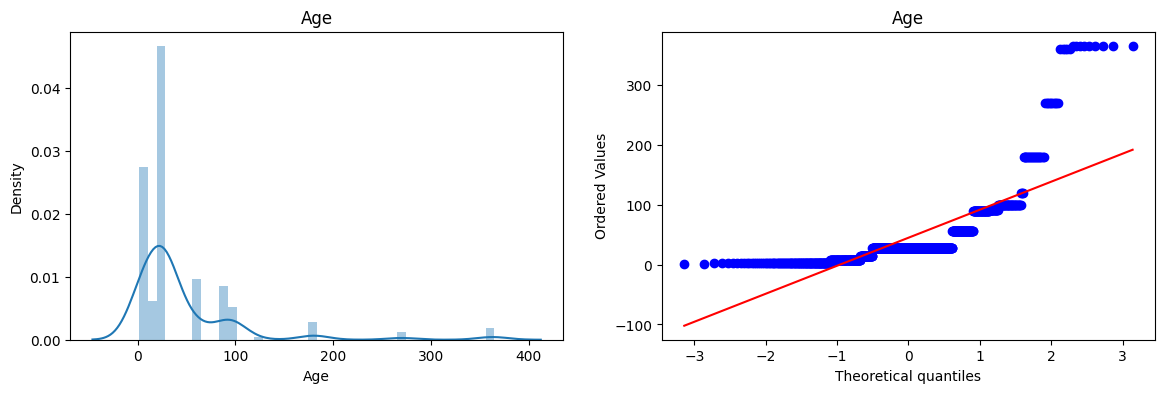

In [68]:
# Plotting the distplots without any transformation

for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [69]:
# Applying BOX-COX Transform

pt = PowerTransformer(method = 'box-cox')

X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.transform(X_test+0.000001)

pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Blast Furnace Slag,0.025093
1,Fly Ash,-0.038970
2,Water,0.772682
3,Superplasticizer,0.098811
4,Coarse Aggregate,1.129813
5,Fine Aggregate,1.782018
6,Age,0.066631


In [70]:
#Applying linear regression

lr = LinearRegression()

lr.fit(X_train_transformed,y_train)

y_pred = lr.predict(X_test_transformed)

In [71]:
y_pred

array([50.66503378, 44.40886652, 65.06682974, 38.10973956, 25.99683934,
       40.9038293 , 31.95740947, 48.47350203, 30.66088142, 44.55614359,
       41.54421914, 23.89331106, 50.20939659, 43.77622282, 30.4073461 ,
       32.53392743, 32.15067635, 21.71887131, 32.82404647, 30.12059311,
       36.7510608 , 31.41326774, 38.49419745, 15.61951923, 35.84024633,
       34.0170409 , 12.51501758, 51.1307269 , 51.7359532 , 13.39336247,
       38.08834108, 34.37348783, 48.92441451, 53.89249945, 18.15485784,
       32.9537877 , 30.28262309, 41.39698492, 17.14207127, 42.32677306,
       17.21079512,  6.85163375, 36.47528433, 40.49720102,  8.09532542,
       60.05872239, 51.31906718, 53.21672431, 24.46410339, 11.15934839,
       46.5257219 , 43.75698876, 35.73229767, 25.59267109, 28.97202173,
       36.70557153, 24.9802465 , 15.38653673, 38.32444781, 26.11108667,
       41.25118774, 17.30230668, 36.64039633, 47.51320171, 28.38175388,
       35.37120655, 31.94173794, 28.4295619 , 27.21077366, 23.39

In [72]:
# accuracy

r2_score(y_test,y_pred)

0.6954513839639116

In [73]:
#using cross val score

pt = PowerTransformer(method = 'box-cox')
X_transformed = pt.fit_transform(X+0.0000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,Y,scoring='r2'))

np.float64(0.40799787931225373)

C:\Users\Gayathri\AppData\Local\Temp\ipykernel_8288\1031937615.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Gayathri\AppData\Local\Temp\ipykernel_8288\1031937615.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


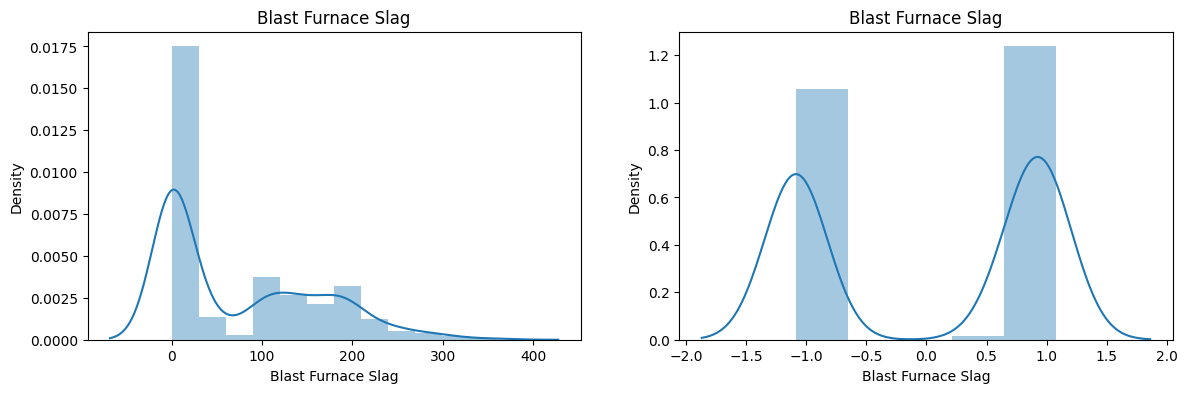

C:\Users\Gayathri\AppData\Local\Temp\ipykernel_8288\1031937615.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Gayathri\AppData\Local\Temp\ipykernel_8288\1031937615.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


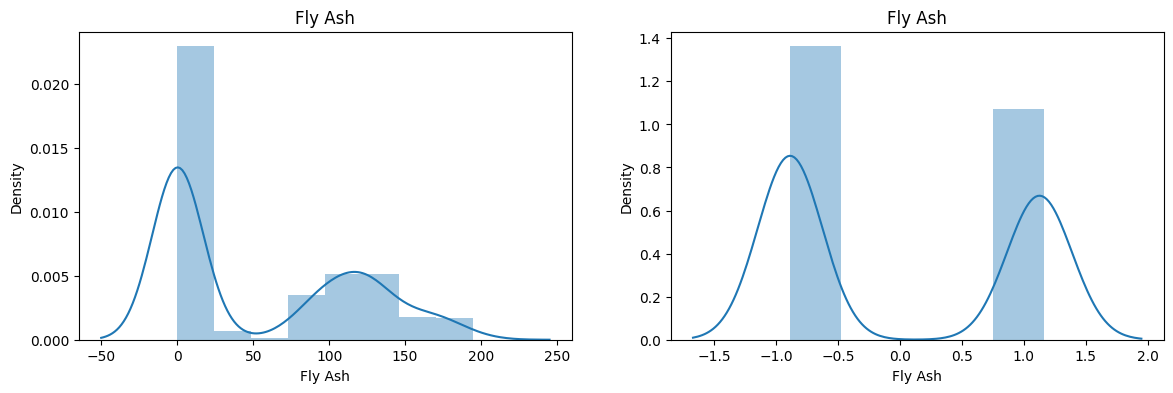

C:\Users\Gayathri\AppData\Local\Temp\ipykernel_8288\1031937615.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Gayathri\AppData\Local\Temp\ipykernel_8288\1031937615.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


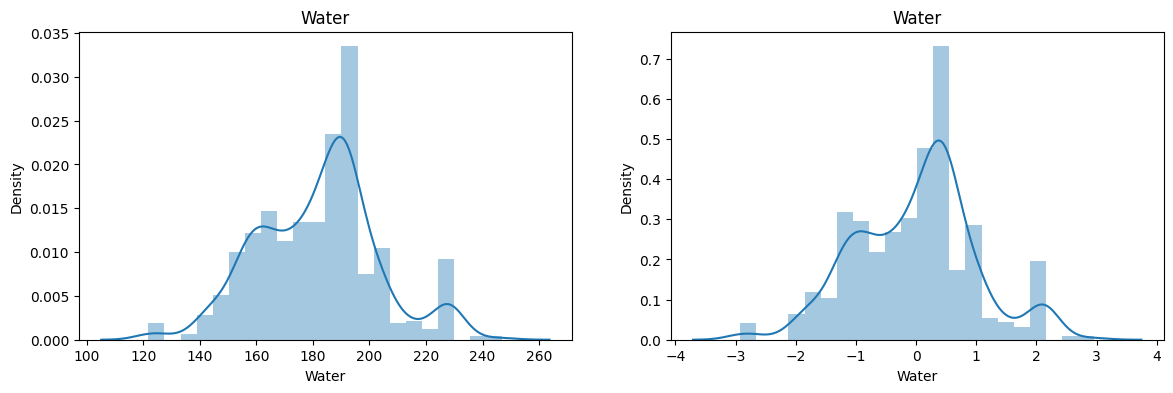

C:\Users\Gayathri\AppData\Local\Temp\ipykernel_8288\1031937615.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Gayathri\AppData\Local\Temp\ipykernel_8288\1031937615.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


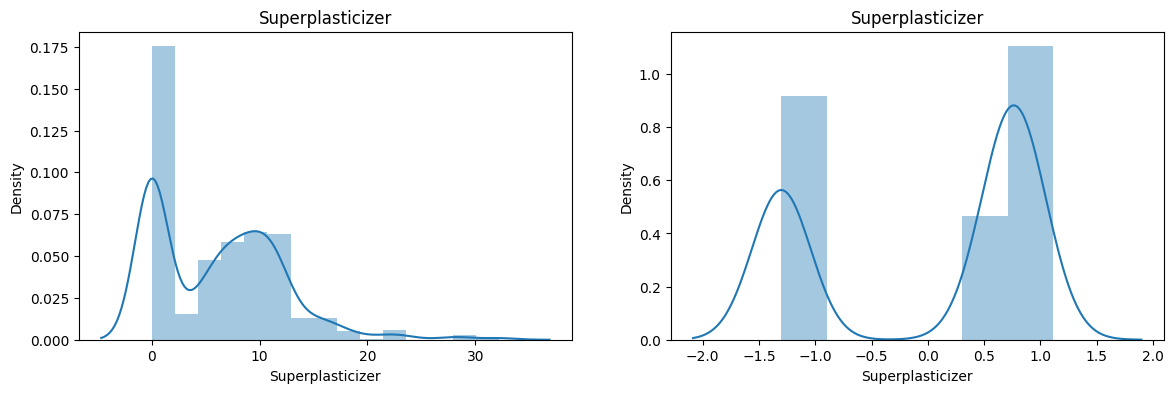

C:\Users\Gayathri\AppData\Local\Temp\ipykernel_8288\1031937615.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Gayathri\AppData\Local\Temp\ipykernel_8288\1031937615.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


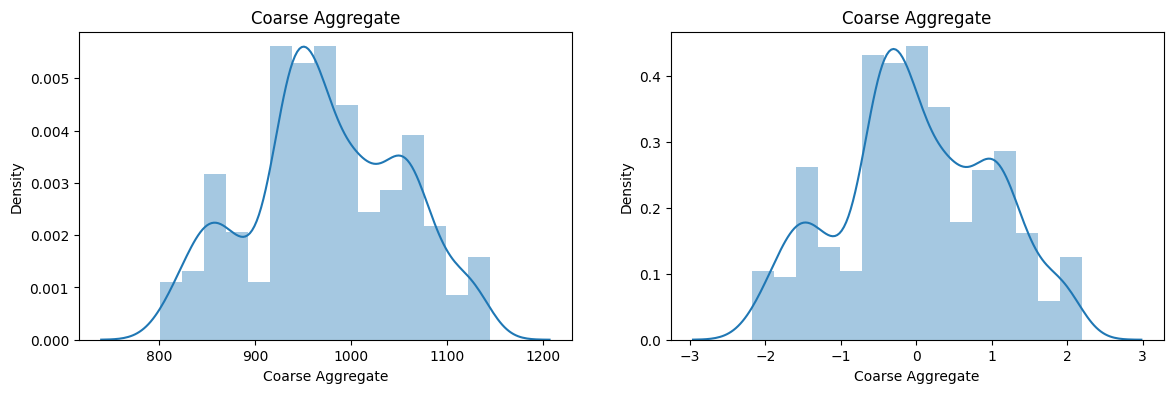

C:\Users\Gayathri\AppData\Local\Temp\ipykernel_8288\1031937615.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Gayathri\AppData\Local\Temp\ipykernel_8288\1031937615.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


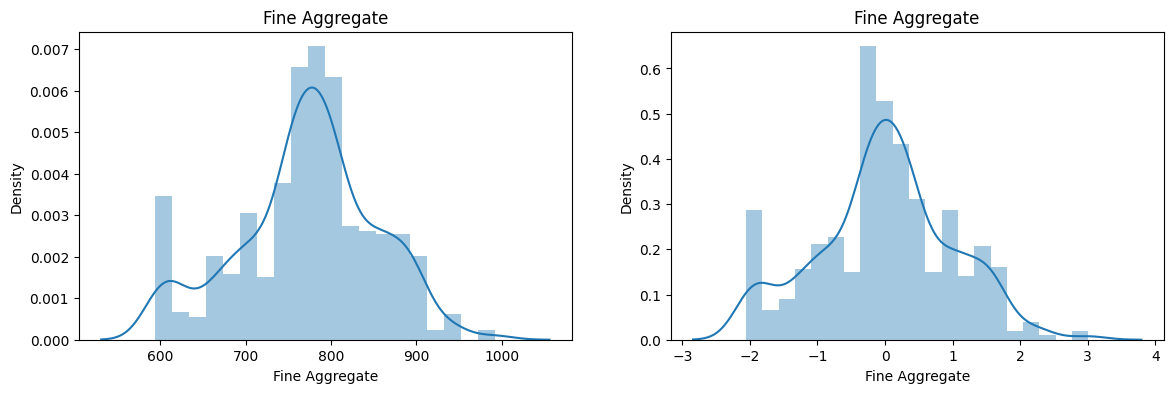

C:\Users\Gayathri\AppData\Local\Temp\ipykernel_8288\1031937615.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Gayathri\AppData\Local\Temp\ipykernel_8288\1031937615.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


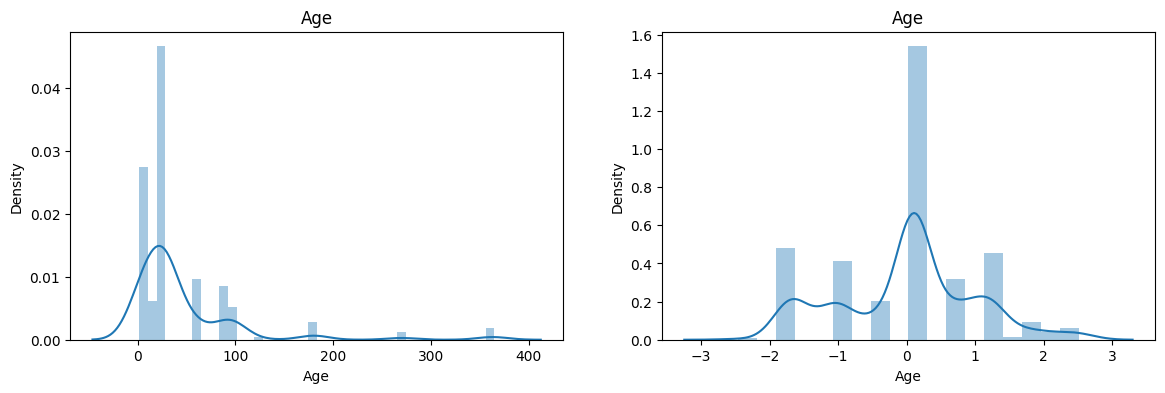

In [74]:
# Before and after comparision for Box-Cox Plot
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title(col)

    plt.show()

Apply yeo-Johnson transform

In [77]:
pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,y_train)

y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(y_test,y_pred))

pd.DataFrame({'cols':X_train.columns,'Yeo_johnson_lambdas':pt1.lambdas_})


0.6954513839639116


,cols,Yeo_johnson_lambdas
0,Blast Furnace Slag,0.015715
1,Fly Ash,-0.161447
2,Water,0.771307
3,Superplasticizer,0.253935
4,Coarse Aggregate,1.130050
5,Fine Aggregate,1.783100
6,Age,0.019885


In [78]:
# apply cross val score

pt = PowerTransformer()

X_transformed2 = pt.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed2,Y,scoring='r2'))

np.float64(0.39528258772191327)

In [80]:
# Side by side Lambdas
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,Blast Furnace Slag,0.016633,0.015715
1,Fly Ash,-0.136480,-0.161447
2,Water,0.808438,0.771307
3,Superplasticizer,0.264160,0.253935
4,Coarse Aggregate,1.129395,1.130050
5,Fine Aggregate,1.830764,1.783100
6,Age,0.001771,0.019885
